In [1]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("LG_G4_C20_m11_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [2]:
data

['t_n103        35.8275 (32.9639, 42.5697) (32.5268, 41.4451)  8.9183 (Jnode 202)\n',
 't_n104        23.3643 (17.9942, 33.0769) (17.4441, 32.2808) 14.8366 (Jnode 201)\n',
 't_n105        22.4170 (17.2822, 31.8434) (16.5884, 30.8958) 14.3074 (Jnode 200)\n',
 't_n106        20.0014 (15.5070, 28.4610) (14.9017, 27.5640) 12.6623 (Jnode 199)\n',
 't_n107        19.3916 (15.0656, 27.5844) (14.5433, 26.7514) 12.2082 (Jnode 198)\n',
 't_n108        18.3022 (14.2974, 25.9027) (13.6963, 24.9984) 11.3021 (Jnode 197)\n',
 't_n109         8.3265 ( 6.1985, 11.7900) ( 5.8945, 11.2771)  5.3826 (Jnode 196)\n',
 't_n110         8.2549 ( 6.1453, 11.6893) ( 5.8670, 11.2061)  5.3391 (Jnode 195)\n',
 't_n111         8.0170 ( 5.9650, 11.3533) ( 5.6940, 10.8786)  5.1846 (Jnode 194)\n',
 't_n112         7.7099 ( 5.7316, 10.9245) ( 5.5023, 10.4971)  4.9947 (Jnode 193)\n',
 't_n113         7.3580 ( 5.4678, 10.4270) ( 5.2631, 10.0334)  4.7703 (Jnode 192)\n',
 't_n114         5.3516 ( 3.9196,  7.6430) ( 3.7249,  

In [3]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [4]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     else:
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     if line[4].startswith('('):
#         upper_ci_iqtree.append(float(line[4][1:-1]))
#     else:
#         upper_ci_iqtree.append(float(line[4][:-1]))
#     # posterior_mean_baseml.append(float(line[4]))
#     # lower_ci_baseml.append(float(line[5]))
#     # upper_ci_baseml.append(float(line[6]))
# 
# for line in mu_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_iqtree.append(float(line[1]))
#     lower_ci_mu_iqtree.append(float(line[3][:-1]))
#     upper_ci_mu_iqtree.append(float(line[4][:-1]))
#
# for line in var_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_iqtree.append(float(line[1]))
#     lower_ci_var_iqtree.append(float(line[3][:-1]))
#     upper_ci_var_iqtree.append(float(line[4][:-1]))

In [5]:
node_name

['t_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107',
 't_n108',
 't_n109',
 't_n110',
 't_n111',
 't_n112',
 't_n113',
 't_n114',
 't_n115',
 't_n116',
 't_n117',
 't_n118',
 't_n119',
 't_n120',
 't_n121',
 't_n122',
 't_n123',
 't_n124',
 't_n125',
 't_n126',
 't_n127',
 't_n128',
 't_n129',
 't_n130',
 't_n131',
 't_n132',
 't_n133',
 't_n134',
 't_n135',
 't_n136',
 't_n137',
 't_n138',
 't_n139',
 't_n140',
 't_n141',
 't_n142',
 't_n143',
 't_n144',
 't_n145',
 't_n146',
 't_n147',
 't_n148',
 't_n149',
 't_n150',
 't_n151',
 't_n152',
 't_n153',
 't_n154',
 't_n155',
 't_n156',
 't_n157',
 't_n158',
 't_n159',
 't_n160',
 't_n161',
 't_n162',
 't_n163',
 't_n164',
 't_n165',
 't_n166',
 't_n167',
 't_n168',
 't_n169',
 't_n170',
 't_n171',
 't_n172',
 't_n173',
 't_n174',
 't_n175',
 't_n176',
 't_n177',
 't_n178',
 't_n179',
 't_n180',
 't_n181',
 't_n182',
 't_n183',
 't_n184',
 't_n185',
 't_n186',
 't_n187',
 't_n188',
 't_n189',
 't_n190',
 't_n191',
 't_n192',
 't_n193',

In [6]:
posterior_mean_iqtree

[35.8275,
 23.3643,
 22.417,
 20.0014,
 19.3916,
 18.3022,
 8.3265,
 8.2549,
 8.017,
 7.7099,
 7.358,
 5.3516,
 3.8156,
 2.8994,
 1.4624,
 5.6693,
 4.8322,
 7.6777,
 5.0129,
 7.3534,
 5.881,
 4.7813,
 3.904,
 7.1086,
 6.6898,
 1.7379,
 7.9003,
 7.0911,
 5.4255,
 4.3066,
 4.8641,
 4.4262,
 3.6948,
 3.4837,
 16.9603,
 13.4863,
 18.3891,
 16.7843,
 15.6287,
 12.7218,
 6.6282,
 12.2463,
 10.7325,
 9.5425,
 8.077,
 15.0836,
 13.8806,
 2.9769,
 1.2818,
 20.8485,
 19.3544,
 17.2931,
 16.7773,
 18.2758,
 12.0562,
 14.9175,
 11.7675,
 22.6818,
 21.2158,
 19.0963,
 17.9067,
 15.0912,
 10.029,
 13.305,
 18.6904,
 5.613,
 18.8163,
 11.838,
 11.4417,
 11.1022,
 10.4955,
 9.5887,
 9.1152,
 8.7798,
 8.3884,
 7.4645,
 6.4412,
 5.4141,
 7.5712,
 7.1023,
 5.6213,
 6.4125,
 8.1979,
 7.549,
 6.9758,
 6.0408,
 4.1226,
 7.7196,
 6.9337,
 6.1277,
 9.0836,
 8.5886,
 8.1257,
 7.1975,
 5.262,
 8.1168,
 4.5534,
 3.6047,
 1.3114,
 11.3606,
 9.6257]

In [7]:
lower_ci_iqtree

[]

In [8]:
upper_ci_iqtree

[]

In [9]:
file_LG = open("LG_m11_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_baseml.append(float(line[3][1:-1]))
#     else:
#          lower_ci_baseml.append(float(line[3][:-1]))
#     if line[4].startswith('('):
#         upper_ci_baseml.append(float(line[4][1:-1]))
#     else:
#          upper_ci_baseml.append(float(line[4][:-1]))
#         
#     
# for line in mu_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_baseml.append(float(line[1]))
#     lower_ci_mu_baseml.append(float(line[3][:-1]))
#     upper_ci_mu_baseml.append(float(line[4][:-1]))
    
# for line in var_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_baseml.append(float(line[1]))
#     lower_ci_var_baseml.append(float(line[3][:-1]))
#     upper_ci_var_baseml.append(float(line[4][:-1]))

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
# xerr = [np.array(lower_ci_baseml), 
#         np.array(upper_ci_baseml)]
# yerr = [np.array(lower_ci_iqtree), 
#         np.array(upper_ci_iqtree)]
# 
# # Plotting
# fig, ax = plt.subplots(figsize=(15, 15))
# ax.plot([-0.1,90], 
#         [-0.1, 90], 
#         'k--', label='y=x')
# ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
#             xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')
# 
# # Labels and title
# ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
# ax.set_ylabel('Posterior mean age LG+G4 [100 Mya]', fontsize=18)
# ax.set_title('Posterior mean age comparison between LG and LG+G4 models [t116 ~ B(1.25,2.482)]')
# ax.legend()
# 
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_c11.png')

In [11]:
posterior_mean_baseml

[35.3756,
 24.9541,
 23.4387,
 20.6959,
 19.8034,
 17.9152,
 8.7178,
 8.5963,
 8.1499,
 7.7048,
 7.2621,
 5.2764,
 3.7429,
 2.7404,
 1.5931,
 5.5942,
 4.5957,
 7.6844,
 4.9764,
 7.2603,
 5.7094,
 4.5328,
 4.1159,
 7.1203,
 6.563,
 2.0879,
 8.0536,
 7.0796,
 5.4057,
 4.2516,
 4.933,
 4.3326,
 3.5019,
 3.8558,
 16.4113,
 13.3303,
 18.4677,
 16.4833,
 14.8296,
 12.0098,
 6.6412,
 11.8427,
 9.9821,
 8.5804,
 7.048,
 14.762,
 13.2279,
 3.6489,
 1.664,
 20.8755,
 18.8886,
 16.2873,
 15.96,
 17.8364,
 11.8379,
 14.5298,
 11.0013,
 23.9113,
 21.9765,
 19.3874,
 17.726,
 14.9689,
 10.5437,
 12.8304,
 18.9047,
 7.0801,
 19.2094,
 14.8053,
 13.8189,
 12.986,
 11.999,
 10.746,
 10.056,
 9.4571,
 8.7263,
 7.5217,
 6.3247,
 5.2149,
 7.7072,
 7.11,
 5.5666,
 6.071,
 8.6889,
 7.7711,
 6.9142,
 5.7985,
 4.0025,
 7.8771,
 6.9529,
 5.9459,
 9.8564,
 9.0424,
 8.2087,
 7.0102,
 4.8937,
 8.4852,
 5.7708,
 4.4254,
 1.7614,
 14.1229,
 11.8077]

In [12]:
posterior_mean_iqtree

[35.8275,
 23.3643,
 22.417,
 20.0014,
 19.3916,
 18.3022,
 8.3265,
 8.2549,
 8.017,
 7.7099,
 7.358,
 5.3516,
 3.8156,
 2.8994,
 1.4624,
 5.6693,
 4.8322,
 7.6777,
 5.0129,
 7.3534,
 5.881,
 4.7813,
 3.904,
 7.1086,
 6.6898,
 1.7379,
 7.9003,
 7.0911,
 5.4255,
 4.3066,
 4.8641,
 4.4262,
 3.6948,
 3.4837,
 16.9603,
 13.4863,
 18.3891,
 16.7843,
 15.6287,
 12.7218,
 6.6282,
 12.2463,
 10.7325,
 9.5425,
 8.077,
 15.0836,
 13.8806,
 2.9769,
 1.2818,
 20.8485,
 19.3544,
 17.2931,
 16.7773,
 18.2758,
 12.0562,
 14.9175,
 11.7675,
 22.6818,
 21.2158,
 19.0963,
 17.9067,
 15.0912,
 10.029,
 13.305,
 18.6904,
 5.613,
 18.8163,
 11.838,
 11.4417,
 11.1022,
 10.4955,
 9.5887,
 9.1152,
 8.7798,
 8.3884,
 7.4645,
 6.4412,
 5.4141,
 7.5712,
 7.1023,
 5.6213,
 6.4125,
 8.1979,
 7.549,
 6.9758,
 6.0408,
 4.1226,
 7.7196,
 6.9337,
 6.1277,
 9.0836,
 8.5886,
 8.1257,
 7.1975,
 5.262,
 8.1168,
 4.5534,
 3.6047,
 1.3114,
 11.3606,
 9.6257]

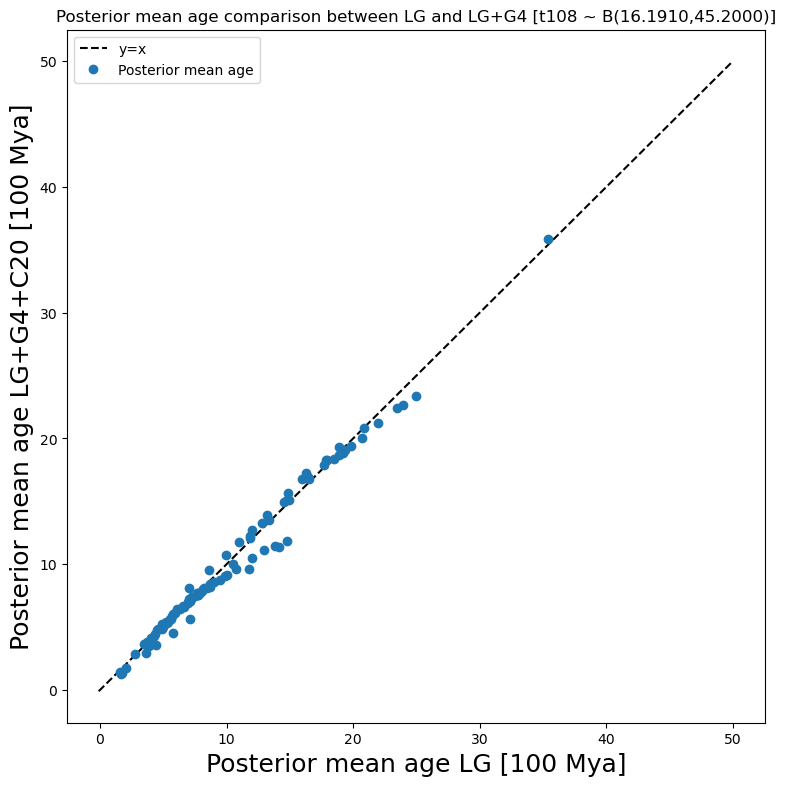

In [13]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([-0.1,50], 
        [-0.1, 50], 
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
ax.set_ylabel('Posterior mean age LG+G4+C20 [100 Mya]', fontsize=18)
ax.set_title('Posterior mean age comparison between LG and LG+G4 [t108 ~ B(16.1910,45.2000)]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_C20_m11_scatter.png')

In [14]:
# fig, ax = plt.subplots(figsize=(9 ,9))
# ax.plot([0.01,0.04], 
#         [0.01, 0.04], 
#         'k--', label='y=x')
# ax.plot(posterior_mean_mu_baseml, posterior_mean_mu_iqtree, 'o', label='Posterior mean rates for partitions')
#  
# # Labels and title
# ax.set_xlabel('Posterior mean rate [LG]', fontsize=18)
# ax.set_ylabel('Posterior mean rate [LG+G4]', fontsize=18)
# ax.set_title('Posterior mean rate comparison between LG and LG+G4 [Cherry only calibration/IQ-TREE]')
# ax.legend()
# 
# # point_x = posterior_mean_baseml[0]  # Example: first point in the list
# # point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# # ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin__posterior_mean_rate_comparison_LG_G4_all_scatter.png')